## Introduction

### in this project i will try to provide a solution to some questions that i intend to ask by using the tmdb database:
### - what are the genres that contributed the most in the movie industry?
### - does a higher vote count contribute to a higher vote average?
### - did the revenue increase over the years in the movie industry?

In [71]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


## General Properties

In [48]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [49]:
df.shape

(10866, 21)

In [50]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       





## Data Cleaning (dropping the colomns that i won't use and removing the null and zero values).

In [52]:
df.drop(['id','imdb_id','homepage','tagline','keywords','overview','production_companies','budget_adj','revenue_adj','release_date','popularity'], axis=1, inplace=True)
df.head()

,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          10866 non-null  int64  
 1   revenue         10866 non-null  int64  
 2   original_title  10866 non-null  object 
 3   cast            10790 non-null  object 
 4   director        10822 non-null  object 
 5   runtime         10866 non-null  int64  
 6   genres          10843 non-null  object 
 7   vote_count      10866 non-null  int64  
 8   vote_average    10866 non-null  float64
 9   release_year    10866 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 849.0+ KB


In [54]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          10732 non-null  int64  
 1   revenue         10732 non-null  int64  
 2   original_title  10732 non-null  object 
 3   cast            10732 non-null  object 
 4   director        10732 non-null  object 
 5   runtime         10732 non-null  int64  
 6   genres          10732 non-null  object 
 7   vote_count      10732 non-null  int64  
 8   vote_average    10732 non-null  float64
 9   release_year    10732 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 922.3+ KB


In [55]:
print(df['budget'].mean())

14805062.129332837


In [56]:
df['budget'] = df['budget'].replace(0, 14805062.129332837)

In [57]:
print(df['revenue'].mean())

40316220.714405514


In [58]:
df['revenue'] = df['revenue'].replace(0, 62435295.217423685)

In [59]:
print(df['runtime'].mean())

102.46785314945956


In [60]:
df['runtime'] = df['runtime'].replace(0, 102.46785314945956)

## checking and visualizing the data

In [61]:
df.describe()

,budget,revenue,runtime,vote_count,vote_average,release_year
count,1.073200e+04,1.073200e+04,10732.000000,10732.000000,10732.000000,10732.000000
mean,2.250005e+07,7.457070e+07,102.735194,219.802739,5.964620,2001.260436
std,2.813866e+07,1.097455e+08,30.038841,578.789325,0.930286,12.819831
min,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,1.480506e+07,4.021780e+07,90.000000,17.000000,5.400000,1995.000000
50%,1.480506e+07,6.243530e+07,99.000000,39.000000,6.000000,2006.000000
75%,1.600000e+07,6.243530e+07,112.000000,148.000000,6.600000,2011.000000
max,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


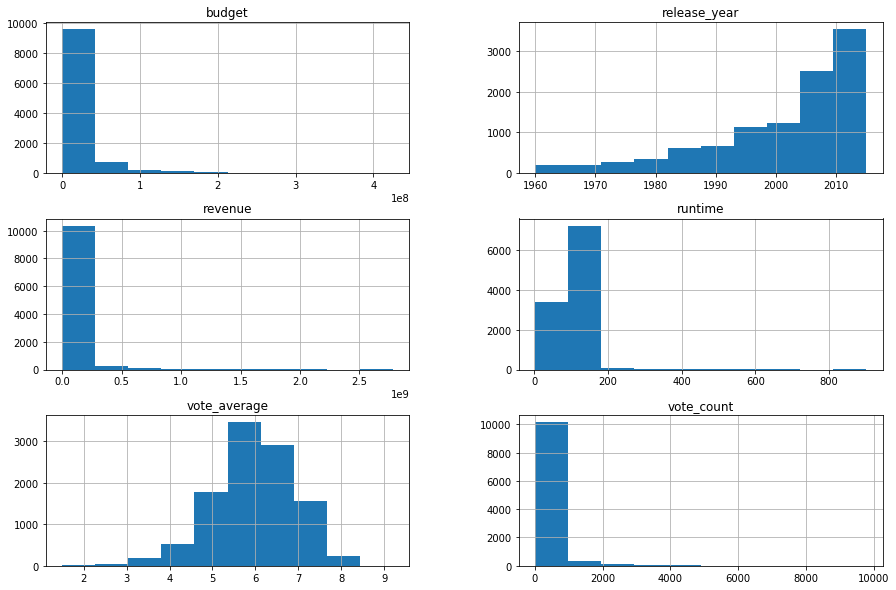

In [62]:
df.hist(figsize=(15,10));

<a id='eda'></a>
## Exploratory Data Analysis


## Research Question 1: what are the genres that contributed the most in the movie industry?

In [63]:
def count_cast(x):
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #counting the genres.
    count = data.value_counts(ascending=False)
    return count
#calling the function.
count = count_cast('genres')
count.head(10)

Drama              4747
Comedy             3775
Thriller           2903
Action             2377
Romance            1708
Horror             1636
Adventure          1465
Crime              1354
Science Fiction    1222
Family             1214
dtype: int64

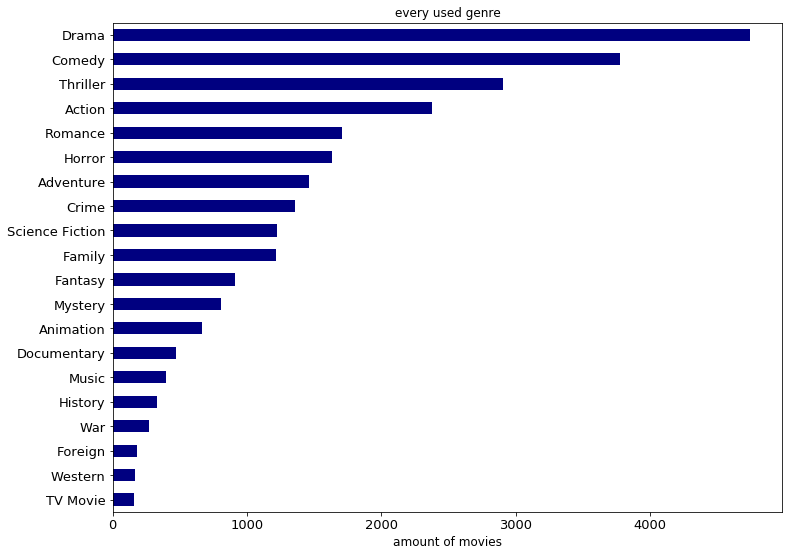

In [70]:
count.sort_values(ascending = True, inplace = True)

#ploting
plot = count.plot.barh(color = 'navy', fontsize = 13)

#title
plot.set(title = 'every used genre')

#x axis
plot.set_xlabel('amount of movies', color = 'black', fontsize = '12')

#size
plot.figure.set_size_inches(12, 9)

#showing the bar plot
plt.show()

### clearly there are four frequent genres drama, comedy, thriller and action. As known these have contributed to the movie industry greatly.




## Research Question 2: does a higher vote count contribute to a higher vote average?

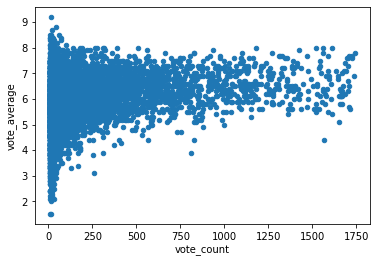

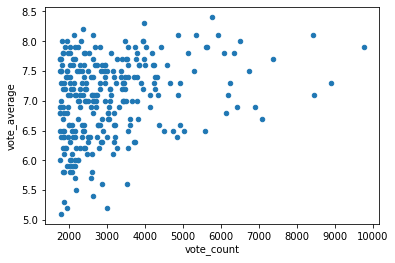

In [65]:
df_vote = df.loc[:, 'vote_count' : 'vote_average']
df_vote_low = df_vote[df_vote['vote_count'] < 1750]
df_vote_high = df_vote[df_vote['vote_count'] > 1750]
df_vote_low.plot(x='vote_count', y='vote_average', kind='scatter');
df_vote_high.plot(x='vote_count', y='vote_average', kind='scatter');

In [66]:
df_vote_low.mean()

vote_count      142.417113
vote_average      5.935710
dtype: float64

In [67]:
df_vote_high.mean()

vote_count      3071.374558
vote_average       7.030035
dtype: float64

### as you can see the mean for the vote average is considerably higher when the vote count is above 1750 votes compared to the vote average when the vote count is less than 1750 votes.

## Research Question 3: did the revenue increase over the years in the movie industry?

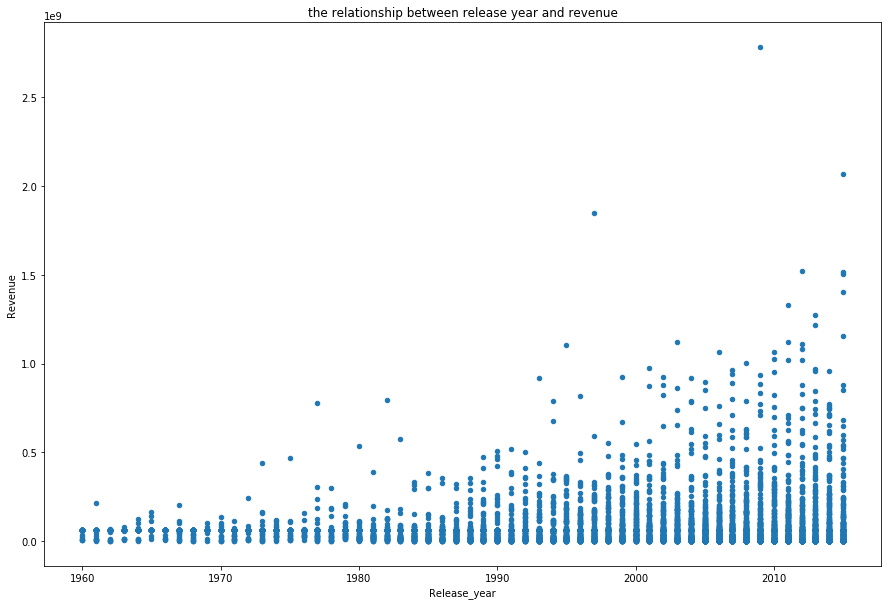

In [68]:
df.plot(x='release_year', y='revenue', kind='scatter', figsize=(15,10))
plt.title('the relationship between release year and revenue')
plt.xlabel('Release_year')
plt.ylabel('Revenue');

### as shown in the chart there is a clear increase in the revenue as the release year gets newer. this shows us that the movie industry was steady since 1980, after that the revenue defenitely started to grow higher and higher.  

<a id='conclusions'></a>
## Conclusions

### In conclusion i would like to mention that investigating a dataset was inspiring and challenging at the same time. First of all i applied the data to the notebook and started understanding and visualizing it, then i dropped the information that dosen't seem to cope with the project.

## Limitations

### While working on the project i came across some obsticles in the data such as null and zero values that were in a good proportion of the data. I removed the null values and filled in the zeros with the the mean. Also the sample dosen't seem to represent the population perfectly.


## the questions

### The first question was about the genres that were in movies the most. the answer didn't surprise me because drama and comedy are very common in movies.

### Secondly i asked if a higher vote count meant a higher rating and it turned out to be practically true.

### The third and last question was about the revenue and if it had increased over the years. The answer was clear that movies make higher revenues nowadays compared to the past.

### The questions that i asked were challenging at first but i managed to answer them all to my satisfaction.
